## LunarLanderContinuous-v2 (DDPG, v1)

In [1]:
import gym
import random
import torch
import numpy as np

import time
#from ddpg_agent import Agent, ReplayBuffer, device
from ddpg_agent_1 import Agent, ReplayBuffer, device
from collections import deque

start_timestep=1e4

from  collections  import deque

env = gym.make('LunarLanderContinuous-v2')
seed = 0
env.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

state = env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
max_action = float(env.action_space.high[0])
threshold = env.spec.reward_threshold
print('threshold: ', threshold)

print('Size of each action:', action_dim)
# examine the state space 
print('Each observes a state with length: {}', state_dim)
print('The state for the first agent looks like:', state[0])

import matplotlib.pyplot as plt
%matplotlib inline
agent = Agent(state_size=state_dim, action_size=action_dim, random_seed=8)


threshold:  200
Size of each action: 2
Each observes a state with length: {} 8
The state for the first agent looks like: -0.00059156417


In [2]:
def ddpg(n_episodes=20000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores_array = []
    avg_scores_array = [] 
        
    time_start = time.time()
    
    timestep_after_last_save = 0
    total_timesteps = 0
        
    for i_episode in range(1, n_episodes+1):
        state = env.reset()                                    # set the environment    
        agent.reset()
        score_average = 0
        
        timestep = 0
        total_reward = 0
        
        done = False

        while True:
            action = agent.act(state)
                        
            # Perform action
            next_state, reward, done, _ = env.step(action) 
            done_bool = 0 if timestep + 1 == env._max_episode_steps else float(done)
            total_reward += reward                          # full episode reward
        
            ## def step(self, states, actions, rewards, next_states, dones, timestep):
            agent.step(state, action, reward, next_state, done, timestep)
            state = next_state                               # roll over states to next time step
            
            timestep += 1     
            total_timesteps += 1
            timestep_after_last_save += 1

            if done:                                  # exit loop if episode finished
                break
        
        scores_deque.append(total_reward)
        scores_array.append(total_reward)

        avg_score = np.mean(scores_deque)
        avg_scores_array.append(avg_score)
        
        # train_by_episode(time_start, i_episode) 
        s = (int)(time.time() - time_start)
                        
        if i_episode % print_every == 0 or (len(scores_deque) == 100 and np.mean(scores_deque) >= threshold) :
            #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            s = (int)(time.time() - time_start) 
            print('Episode {} Score: {:.2f} Average Score: {:.2f}, Time: {:02}:{:02}:{:02} ***    '\
                  .format(i_episode, total_reward, avg_score, s//3600, s%3600//60, s%60))  
            
        if len(scores_deque) == 100 and np.mean(scores_deque) >= threshold:  
            print('Environment solved !   ')
            break
            
    return scores_array, avg_scores_array

scores, avg_scores = ddpg()
    

Episode 10 Score: -312.26 Average Score: -508.87, Time: 00:00:04 ***    
Episode 20 Score: -231.30 Average Score: -601.98, Time: 00:00:15 ***    
Episode 30 Score: -329.78 Average Score: -512.62, Time: 00:00:22 ***    
Episode 40 Score: -337.07 Average Score: -468.51, Time: 00:00:27 ***    
Episode 50 Score: -349.80 Average Score: -442.29, Time: 00:00:32 ***    
Episode 60 Score: -368.60 Average Score: -426.55, Time: 00:00:37 ***    
Episode 70 Score: -278.15 Average Score: -402.61, Time: 00:00:44 ***    
Episode 80 Score: -74.54 Average Score: -382.30, Time: 00:00:50 ***    
Episode 90 Score: -226.69 Average Score: -362.21, Time: 00:00:58 ***    
Episode 100 Score: 6.01 Average Score: -351.43, Time: 00:01:07 ***    
Episode 110 Score: -7.86 Average Score: -330.51, Time: 00:01:19 ***    
Episode 120 Score: -443.82 Average Score: -289.74, Time: 00:01:34 ***    
Episode 130 Score: -319.18 Average Score: -301.73, Time: 00:01:51 ***    
Episode 140 Score: -303.96 Average Score: -305.58, Ti

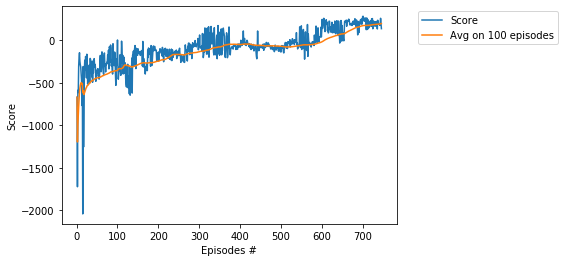

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label="Score")
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, label="Avg on 100 episodes")
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.ylabel('Score')
plt.xlabel('Episodes #')
plt.show()

In [4]:
def save(agent, filename, directory):
    torch.save(agent.actor_local.state_dict(), '%s/%s_actor_local.pth' % (directory, filename))
    torch.save(agent.actor_target.state_dict(), '%s/%s_actor_target.pth' % (directory, filename))
    torch.save(agent.critic_local.state_dict(), '%s/%s_critic_local.pth' % (directory, filename))
    torch.save(agent.critic_target.state_dict(), '%s/%s_critic_target.pth' % (directory, filename))


save(agent, 'LunarLanderContinuous-v2', 'dir_chk_test')

model.save_state_dict

In [5]:
def play(env, agent, n_episodes):
    
    state = env.reset()
    scores_deque = deque(maxlen=100)

    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        
        total_reward = 0
        time_start = time.time()
        timesteps =  0
        
        done = False

        while True:
            
            action = agent.act(state)
            env.render()
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            
            agent.step(state, action, reward, next_state, done, timesteps)
            state = next_state
            timesteps += 1
            
            if done:
                break 

        delta = (int)(time.time() - time_start)
        
        scores_deque.append(total_reward)

        print('Episode {}\tAverage Score: {:.2f}, \t Timesteps: {} \tTime: {:02}:{:02}:{:02}'\
                  .format(i_episode, np.mean(scores_deque), timesteps,\
                          delta//3600, delta%3600//60, delta%60))

In [7]:
play(env=env, agent=agent, n_episodes=10)

Episode 1	Average Score: 170.48, 	 Timesteps: 548 	Time: 00:00:14
Episode 2	Average Score: 190.28, 	 Timesteps: 530 	Time: 00:00:13
Episode 3	Average Score: 186.39, 	 Timesteps: 447 	Time: 00:00:11
Episode 4	Average Score: 193.44, 	 Timesteps: 493 	Time: 00:00:12
Episode 5	Average Score: 198.37, 	 Timesteps: 571 	Time: 00:00:14
Episode 6	Average Score: 199.58, 	 Timesteps: 569 	Time: 00:00:14
Episode 7	Average Score: 198.41, 	 Timesteps: 831 	Time: 00:00:20
Episode 8	Average Score: 194.49, 	 Timesteps: 574 	Time: 00:00:14
Episode 9	Average Score: 191.80, 	 Timesteps: 395 	Time: 00:00:09
Episode 10	Average Score: 195.02, 	 Timesteps: 386 	Time: 00:00:09


In [8]:
save(agent, 'LLC-v2', 'dir_chk_1')

In [9]:
def load(agent, directory, filename):
    agent.actor_local.load_state_dict(torch.load('%s/%s_actor_local.pth' % (directory,  filename)))
    agent.actor_target.load_state_dict(torch.load('%s/%s_actor_target.pth' % (directory,  filename)))
    agent.critic_local.load_state_dict(torch.load('%s/%s_critic_local.pth' % (directory,  filename)))
    agent.critic_target.load_state_dict(torch.load('%s/%s_critic_target.pth' % (directory,  filename)))

In [10]:
load(agent, 'dir_chk_1', 'LLC-v2')
play(env=env, agent=agent, n_episodes=7)

Episode 1	Average Score: 255.19, 	 Timesteps: 346 	Time: 00:00:17
Episode 2	Average Score: 253.04, 	 Timesteps: 339 	Time: 00:00:08
Episode 3	Average Score: 254.17, 	 Timesteps: 414 	Time: 00:00:11
Episode 4	Average Score: 254.71, 	 Timesteps: 379 	Time: 00:00:09
Episode 5	Average Score: 254.58, 	 Timesteps: 368 	Time: 00:00:09
Episode 6	Average Score: 252.35, 	 Timesteps: 464 	Time: 00:00:11
Episode 7	Average Score: 248.49, 	 Timesteps: 328 	Time: 00:00:08


In [11]:
env.close()